## Exploratory Data Analysis

In [1]:
import json
import pdb
import ast
from tqdm import tqdm
from collections import Counter
import requests

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# custom
from utils import *

In [10]:
YEAR = 2017

works = pd.read_csv(f'./data/{YEAR}/works.{YEAR}.v1.csv')
authors = pd.read_csv(f'./data/{YEAR}/authors.{YEAR}.v1.csv')
venues = pd.read_csv(f'./data/{YEAR}/venues.{YEAR}.v1.csv')
insts = pd.read_csv(f'./data/{YEAR}/insts.{YEAR}.v1.csv')

In [ ]:
works = preprocess_works(works, YEAR, 2022)

In [11]:
print (works.shape)
works.head()

(147235, 15)


,id,doi,title,type,publication_date,host_venue,open_access_is_oa,open_access_oa_status,authorships,page_count,cited_by_count,concepts,referenced_works,abstract,counts_by_year
0,W2963446712,https://doi.org/10.1109/cvpr.2017.243,Densely Connected Convolutional Networks,proceedings-article,2017-07-21,V4306400194,True,green,"[[A2114281204, [I205783295]], [A2566736780, [I...",-1,16035,"[[C41008148, 0.8167397], [C185798385, 0.806655...","[W1677182931, W1903029394, W2097117768, W21020...",Recent work has shown that convolutional netwo...,"[[2022, 2671], [2021, 4520], [2020, 4269], [20..."
1,W2963150697,https://doi.org/10.1109/iccv.2017.322,Mask R-CNN,proceedings-article,2017-03-20,V4306402512,False,closed,"[[A2164292938, [I4210114444]], [A102740216, [I...",-1,11067,"[[C41008148, 0.60304093], [C154945302, 0.41181...","[W1536680647, W1903029394, W1923115158, W19602...","We present a conceptually simple, flexible, an...","[[2022, 1721], [2021, 3369], [2020, 3040], [20..."
2,W2962793481,https://doi.org/10.1109/iccv.2017.244,Unpaired Image-to-Image Translation Using Cycl...,proceedings-article,2017-10-01,V4306419272,True,green,"[[A2112232458, [I95457486]], [A2604325483, [I9...",-1,9368,"[[C2779757391, 0.87979054], [C115961682, 0.661...","[W845365781, W1530781137, W1896934482, W190302...",Image-to-image translation is a class of visio...,"[[2022, 1278], [2021, 2657], [2020, 2620], [20..."
3,W2963073614,https://doi.org/10.1109/cvpr.2017.632,Image-to-Image Translation with Conditional Ad...,proceedings-article,2017-07-21,V4306417987,True,green,"[[A2077136294, [I95457486]], [A2112232458, [I9...",-1,9104,"[[C2779757391, 0.80383134], [C115961682, 0.735...","[W845365781, W1903029394, W1905829557, W197242...",We investigate conditional adversarial network...,"[[2022, 1118], [2021, 2501], [2020, 2440], [20..."
4,W2963351448,https://doi.org/10.1109/iccv.2017.324,Focal Loss for Dense Object Detection,proceedings-article,2017-08-07,V4306400194,True,green,"[[A2618037599, [I205783295]], [A2642611022, [I...",-1,7809,"[[C94915269, 0.8226304], [C41008148, 0.777915]...","[W1536680647, W1903029394, W2031489346, W20369...",The highest accuracy object detectors to date ...,"[[2022, 1549], [2021, 2795], [2020, 2048], [20..."


In [12]:
print (venues.shape)
venues.head()

(1854, 9)


,id,display_name,works_count,cited_by_count,is_oa,type,created_date,concepts,counts_by_year
0,V192814187,BMJ,430759,3368207,False,journal,2016-06-24,"[['C41008148', 85.2], ['C71924100', 73.9], ['C...","[[2022, 87, 102346], [2021, 475, 134220], [202..."
1,V11296630,Journal of the Acoustical Society of America,162796,1306573,False,journal,2016-06-24,"[['C121332964', 91.7], ['C24890656', 81.6], ['...","[[2022, 1441, 45661], [2021, 2355, 63376], [20..."
2,V183492911,Proceedings of SPIE,133134,565093,False,journal,2016-06-24,"[['C121332964', 88.0], ['C41008148', 78.7], ['...","[[2022, 107, 24427], [2021, 108, 31122], [2020..."
3,V25650217,Annals of the Rheumatic Diseases,62237,854138,False,journal,2016-06-24,"[['C71924100', 99.8], ['C126322002', 91.6], ['...","[[2022, 3732, 52328], [2021, 3153, 66206], [20..."
4,V101949793,Sensors,49531,678177,True,journal,2016-06-24,"[['C41008148', 85.4], ['C127413603', 80.2], ['...","[[2022, 8540, 134535], [2021, 8689, 141480], [..."


In [13]:
print (insts.shape)
insts.head()

(13227, 11)


,id,display_name,country_code,type,homepage_url,works_count,cited_by_count,associated_institutions,concepts,counts_by_year,created_date
0,I100066346,University of Stuttgart,DE,education,http://www.uni-stuttgart.de/home/index.en.html,61363,2826118,"[['I4210113675', 'child']]","[['C121332964', 70.3], ['C127413603', 55.1], [...","[[2022, 1861, 182233], [2021, 2941, 236829], [...",2016-06-24
1,I100930933,University College Dublin,IE,education,http://www.ucd.ie/,58635,3043553,"[['I181231927', 'parent'], ['I2800368556', 're...","[['C86803240', 62.1], ['C71924100', 45.5], ['C...","[[2022, 2955, 282480], [2021, 4228, 342585], [...",2016-06-24
2,I10091056,Kanazawa University,JP,education,http://www.kanazawa-u.ac.jp/,45658,2648047,"[['I4210104330', 'related']]","[['C86803240', 75.7], ['C71924100', 62.6], ['C...","[[2022, 1409, 171862], [2021, 2002, 201524], [...",2016-06-24
3,I100005738,Brigham Young University,US,education,http://home.byu.edu/home/,45273,2009563,[],"[['C86803240', 46.8], ['C41008148', 45.0], ['C...","[[2022, 1306, 141716], [2021, 1886, 176444], [...",2016-06-24
4,I100532134,Claude Bernard University Lyon 1,FR,education,http://www.univ-lyon1.fr/home-759942.kjsp,34665,3520320,"[['I4210115427', 'child'], ['I4210143168', 'ch...","[['C86803240', 63.7], ['C185592680', 55.0], ['...","[[2022, 1394, 230930], [2021, 2060, 324532], [...",2016-06-24


<AxesSubplot:xlabel='month', ylabel='count'>

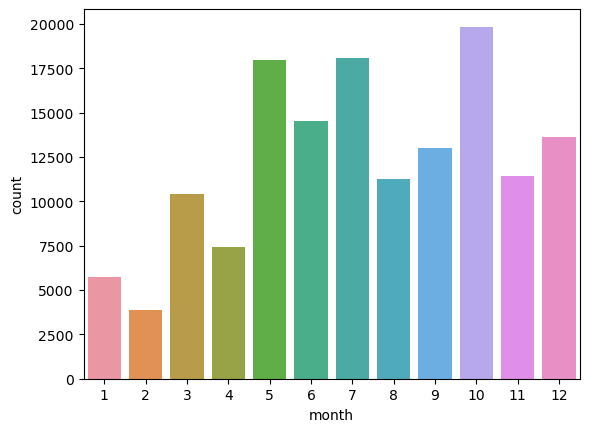

In [14]:
# works by month
works['month'] = works['publication_date'].map(lambda x: x.split('-')[1]).astype(int)
sns.countplot(data=works, x='month')

In [15]:
# no. of unique authors
authors_ = np.unique(flatten(works['authorships'].map(lambda x: [i[0] for i in x]).tolist()))
len(authors_)

344607

In [16]:
# institutions
insts_ = np.unique(flatten(works['authorships'].map(lambda x: [i[1] for i in x]).tolist(), level=3))
len(insts_)

13227

In [17]:
# host venues
venues_ = np.unique(works['host_venue'].tolist())
len(venues_)

1854

In [18]:
# top-k venues
Counter(works['host_venue'].tolist()).most_common(10)

[('V183492911', 2712),
 ('V4306417896', 1567),
 ('V4306419201', 1365),
 ('V4306400194', 1280),
 ('V4306417620', 1089),
 ('V4306417895', 1079),
 ('V4306418012', 1076),
 ('V4306420091', 1065),
 ('V4306418488', 1024),
 ('V4306419087', 1023)]

In [19]:
# referenced works
ref_works = np.unique([j for i in works['referenced_works'].tolist() for j in i])
len(ref_works)

1011252

In [13]:
# works in our data
works_in_df = works['id'].tolist()
len(works_in_df)

128097

In [14]:
# works in common
len(set(works_in_df).intersection(ref_works))

8896

In [28]:
works.head()

,id,doi,title,type,publication_date,host_venue,open_access_is_oa,open_access_oa_status,authorships,page_count,cited_by_count,concepts,referenced_works,abstract,counts_by_year,month,prior_citation_counts
0,W2963446712,https://doi.org/10.1109/cvpr.2017.243,Densely Connected Convolutional Networks,proceedings-article,2017-07-21,V4306400194,True,green,"[[A2114281204, [I205783295]], [A2566736780, [I...",-1,16035,"[[C41008148, 0.8167397], [C185798385, 0.806655...","[W1677182931, W1903029394, W2097117768, W21020...",Recent work has shown that convolutional netwo...,"[[2022, 2671], [2021, 4520], [2020, 4269], [20...",7,8.0
1,W2963150697,https://doi.org/10.1109/iccv.2017.322,Mask R-CNN,proceedings-article,2017-03-20,V4306402512,False,closed,"[[A2164292938, [I4210114444]], [A102740216, [I...",-1,11067,"[[C41008148, 0.60304093], [C154945302, 0.41181...","[W1536680647, W1903029394, W1923115158, W19602...","We present a conceptually simple, flexible, an...","[[2022, 1721], [2021, 3369], [2020, 3040], [20...",3,0.0
2,W2962793481,https://doi.org/10.1109/iccv.2017.244,Unpaired Image-to-Image Translation Using Cycl...,proceedings-article,2017-10-01,V4306419272,True,green,"[[A2112232458, [I95457486]], [A2604325483, [I9...",-1,9368,"[[C2779757391, 0.87979054], [C115961682, 0.661...","[W845365781, W1530781137, W1896934482, W190302...",Image-to-image translation is a class of visio...,"[[2022, 1278], [2021, 2657], [2020, 2620], [20...",10,2.0
3,W2963073614,https://doi.org/10.1109/cvpr.2017.632,Image-to-Image Translation with Conditional Ad...,proceedings-article,2017-07-21,V4306417987,True,green,"[[A2077136294, [I95457486]], [A2112232458, [I9...",-1,9104,"[[C2779757391, 0.80383134], [C115961682, 0.735...","[W845365781, W1903029394, W1905829557, W197242...",We investigate conditional adversarial network...,"[[2022, 1118], [2021, 2501], [2020, 2440], [20...",7,1.0
4,W2963351448,https://doi.org/10.1109/iccv.2017.324,Focal Loss for Dense Object Detection,proceedings-article,2017-08-07,V4306400194,True,green,"[[A2618037599, [I205783295]], [A2642611022, [I...",-1,7809,"[[C94915269, 0.8226304], [C41008148, 0.777915]...","[W1536680647, W1903029394, W2031489346, W20369...",The highest accuracy object detectors to date ...,"[[2022, 1549], [2021, 2795], [2020, 2048], [20...",8,1.0


In [25]:
## sanity checks in data

# 1. do papers have citations prior to publishing?
works['prior_citation_counts'] = works['counts_by_year'].map(
    lambda x: np.sum([item[1] for item in x if item[0] < YEAR])
)

In [27]:
works['prior_citation_counts'].value_counts()

0.0     146381
1.0        706
2.0         96
3.0         21
4.0         11
5.0          5
6.0          4
8.0          2
7.0          2
11.0         1
13.0         1
70.0         1
12.0         1
19.0         1
23.0         1
17.0         1
Name: prior_citation_counts, dtype: int64

In [32]:
works[works['prior_citation_counts']>0]['cited_by_count'].describe()

count      854.000000
mean       182.028103
std        895.963668
min          1.000000
25%          6.000000
50%         20.000000
75%         66.000000
max      16035.000000
Name: cited_by_count, dtype: float64

In [102]:
def preprocess_counts_by_year(counts_by_year, from_publication_year, to_current_year):
    citations = [0]*(to_current_year - from_publication_year + 1)
    counts_by_year_after = [item for item in counts_by_year if item[0] >= from_publication_year]
    for year_i, cc_i in counts_by_year_after:
        citations[year_i-from_publication_year] = cc_i
    return citations    
    
works[f'cc_from{YEAR}_to{2022}'] = works['counts_by_year'].map(
    lambda x: preprocess_counts_by_year(x, YEAR, 2022)
)

In [105]:
works[works[f'cc_from{YEAR}_to{2022}'].map(sum) == works['cited_by_count']].shape

(145694, 35)

In [107]:
works[works[f'cc_from{YEAR}_to{2022}'].map(sum) == works['cited_by_count']].head()

,id,doi,title,type,publication_date,host_venue,open_access_is_oa,open_access_oa_status,authorships,page_count,...,citations_2021,citations_2022,normalized_citation_2017,normalized_citation_2018,normalized_citation_2019,normalized_citation_2020,normalized_citation_2021,normalized_citation_2022,cc_from{YEAR}_to{2022},cc_from2017_to2022
29,W2555618208,https://doi.org/10.1109/cvpr.2017.691,Multi-view 3D Object Detection Network for Aut...,proceedings-article,2017-07-21,V4306417987,True,green,"[[A2119051707, [I99065089]], [A2151001937, [I9...",-1,...,1237,1409,0.009226,0.077360,0.218595,0.295245,0.277502,0.122072,"[13, 109, 308, 416, 391, 172]","[13, 109, 308, 416, 391, 172]"
33,W2557641257,https://doi.org/10.1109/cvpr.2017.733,ECO: Efficient Convolution Operators for Tracking,proceedings-article,2017-07-21,V4306417987,True,green,"[[A260882311, [I102134673]], [A2557978175, [I1...",-1,...,1111,1322,0.006808,0.100605,0.229198,0.243570,0.260212,0.159607,"[9, 133, 303, 322, 344, 211]","[9, 133, 303, 322, 344, 211]"
34,W2963709863,https://doi.org/10.1109/cvpr.2017.241,Learning from Simulated and Unsupervised Image...,proceedings-article,2017-07-21,V4306417987,True,green,"[[A2183241032, [I1311269955]], [A2798413642, [...",-1,...,1205,1277,0.043070,0.196554,0.278778,0.235709,0.189507,0.056382,"[55, 251, 356, 301, 242, 72]","[55, 251, 356, 301, 242, 72]"
45,W2594519801,https://doi.org/10.1109/cvpr.2017.261,ScanNet: Richly-Annotated 3D Reconstructions o...,proceedings-article,2017-07-21,V4306417987,True,green,"[[A2158018495, [I97018004]], [A2111957820, [I2...",-1,...,1014,1116,0.010753,0.068100,0.202509,0.288530,0.338710,0.091398,"[12, 76, 226, 322, 378, 102]","[12, 76, 226, 322, 378, 102]"
49,W2561715562,https://doi.org/10.1109/cvpr.2017.215,CLEVR: A Diagnostic Dataset for Compositional ...,proceedings-article,2017-07-01,V4306417987,True,green,"[[A2345205178, [I97018004]], [A1988254826, [I2...",-1,...,1008,1085,0.035023,0.134562,0.213825,0.257143,0.288479,0.070968,"[38, 146, 232, 279, 313, 77]","[38, 146, 232, 279, 313, 77]"


In [92]:
works.shape

(147235, 35)

In [33]:
# 2. years of data before/after publishishing
works['years_prior'] = works['counts_by_year'].map(
    lambda x: [item[0] for item in x if item[0] < YEAR]
)

works['years_after'] = works['counts_by_year'].map(
    lambda x: [item[0] for item in x if item[0] >= YEAR]
)

works['citations_prior'] = works['counts_by_year'].map(
    lambda x: [item[1] for item in x if item[0] < YEAR]
)

works['citations_after'] = works['counts_by_year'].map(
    lambda x: [item[1] for item in x if item[0] >= YEAR]
)

In [35]:
works[works['years_prior'].map(len) > 0].shape

(854, 21)

In [37]:
# works[ > 0].shape
works['years_after'].map(len).describe()

count    147235.000000
mean          1.960329
std           1.802551
min           0.000000
25%           0.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: years_after, dtype: float64

In [51]:
def find_citation(counts_by_year, year_i, year_0):
    result = [item[1] for item in counts_by_year if item[0] <= year_i and item[0] >= year_0]
    if len(result):
        return np.sum(result)
    else:
        return 0

for year_i in [2017, 2018, 2019, 2020, 2021, 2022]:
    works[f'citations_{year_i}'] = works['counts_by_year'].map(
        lambda x: find_citation(x, year_i, YEAR)
    )

In [52]:
works[f'citations_2022'].describe()

count    147235.000000
mean          7.457296
std          81.308274
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max       15995.000000
Name: citations_2022, dtype: float64

In [66]:
works[works['cited_by_count'] - works['citations_2022'] == 0]['cited_by_count'].describe()

count    145694.000000
mean          5.794034
std          21.158617
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max        1409.000000
Name: cited_by_count, dtype: float64

In [76]:
def find_normalized_citation(counts_by_year, year_i, year_0):
    total = [item[1] for item in counts_by_year if item[0] >= year_0]
    till_year_i = [item[1] for item in counts_by_year if item[0] == year_i]
    if len(till_year_i):
        return np.sum(till_year_i)/np.sum(total)
    else:
        return 0
    
for year_i in [2017, 2018, 2019, 2020, 2021, 2022]:
    works[f'normalized_citation_{year_i}'] = works['counts_by_year'].map(
        lambda x: find_normalized_citation(x, year_i, YEAR)
    )

In [78]:
works[
    [
        f'normalized_citation_{year_i}' 
            for year_i in [2017, 2018, 2019, 2020, 2021, 2022]
    ]
].mean()

works[
    [
        f'normalized_citation_{year_i}' 
            for year_i in [2017, 2018, 2019, 2020, 2021, 2022]
    ]
].std()

normalized_citation_2017    0.030750
normalized_citation_2018    0.145307
normalized_citation_2019    0.172004
normalized_citation_2020    0.156738
normalized_citation_2021    0.138050
normalized_citation_2022    0.077606
dtype: float64

<AxesSubplot:>

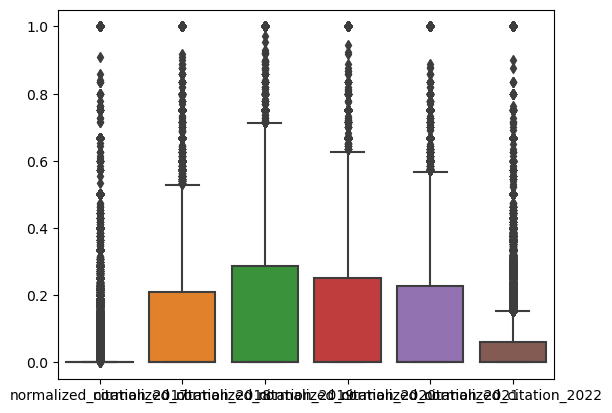

In [82]:
sns.boxplot(data=works[
    [f'normalized_citation_{year_i}' for year_i in [2017, 2018, 2019, 2020, 2021, 2022]]
])

<AxesSubplot:xlabel='cited_by_count', ylabel='Count'>

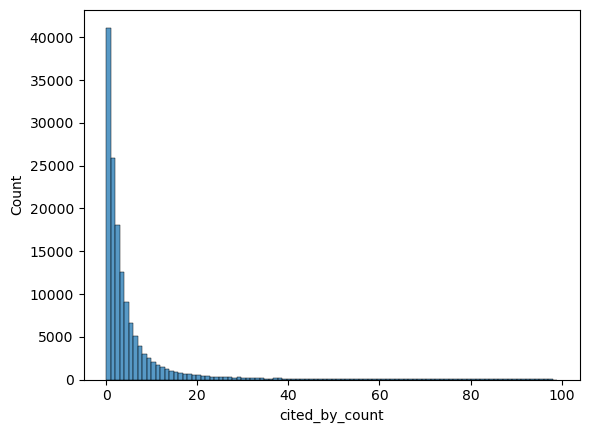

In [57]:
sns.histplot(data=works[works['cited_by_count']< 100], x='cited_by_count', bins=100)

In [53]:
works[f'cited_by_count'].describe()

count    147235.000000
mean          7.472082
std          81.461850
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max       16035.000000
Name: cited_by_count, dtype: float64

In [ ]:
works['citations_after'].map(
    lambda x: 
)

In [49]:
works['citations_after']

0         [2671, 4520, 4269, 3019, 1367, 149]
1           [1721, 3369, 3040, 2237, 650, 40]
2           [1278, 2657, 2620, 1945, 767, 85]
3          [1118, 2501, 2440, 1984, 896, 149]
4            [1549, 2795, 2048, 1133, 258, 8]
                         ...                 
147230                                     []
147231                                     []
147232                                     []
147233                                     []
147234                                     []
Name: citations_after, Length: 147235, dtype: object

In [20]:
## Distribution of 2012 CS paper types

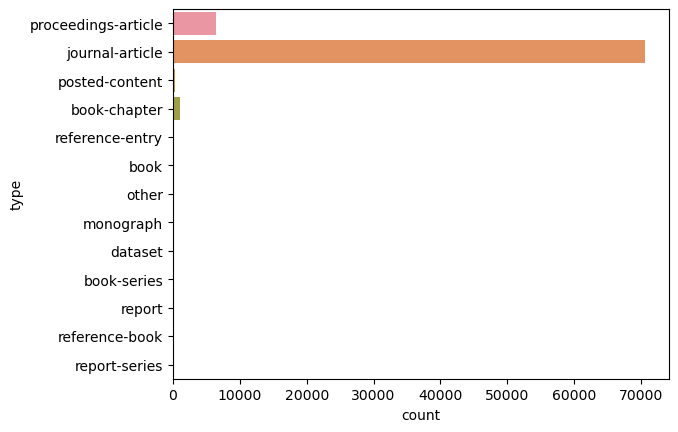

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:16<00:00,  1.37it/s]


Text(0, 0.5, 'Count')

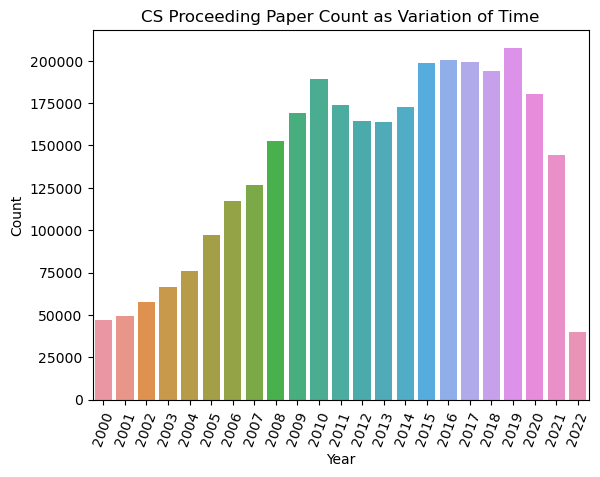

In [17]:
DATA_URL = 'https://api.openalex.org/works?'\
                'filter=from_publication_date:{}-01-01,'\
                'to_publication_date:{}-12-31,'\
                'has_abstract:true,'\
                'has_references:true,'\
                'is_paratext:false,'\
                'is_retracted:false,'\
                'type:proceedings-article,'\
                'concepts.id:C41008148'

papers_over_years = []
years = list(range(2000, 2023))
for year_i in tqdm(years):
    try:
        response = requests.get(DATA_URL.format(year_i, year_i)).json()
        counts = response['meta']['count']
        papers_over_years.append(counts)
    except Exception as err:
        print (err)
        print (response)
        break

sns.barplot(x=years, y=papers_over_years)
plt.gca().set_title("CS Proceeding Paper Count as Variation of Time")
plt.xticks(rotation=70)
plt.gca().set_xlabel("Year")
plt.gca().set_ylabel("Count")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:20<00:00,  1.13it/s]


Text(0, 0.5, 'Count')

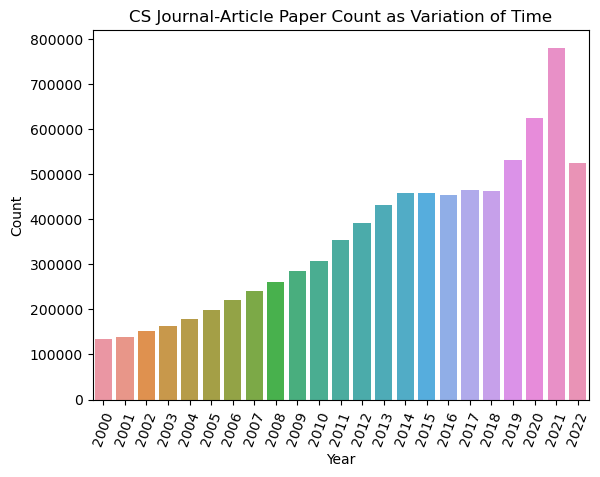

In [18]:
DATA_URL = 'https://api.openalex.org/works?'\
                'filter=from_publication_date:{}-01-01,'\
                'to_publication_date:{}-12-31,'\
                'has_abstract:true,'\
                'has_references:true,'\
                'is_paratext:false,'\
                'is_retracted:false,'\
                'type:journal-article,'\
                'concepts.id:C41008148'

papers_over_years = []
years = list(range(2000, 2023))
for year_i in tqdm(years):
    try:
        response = requests.get(DATA_URL.format(year_i, year_i)).json()
        counts = response['meta']['count']
        papers_over_years.append(counts)
    except Exception as err:
        print (err)
        print (response)
        break

sns.barplot(x=years, y=papers_over_years)
plt.xticks(rotation=70)
plt.gca().set_title("CS Journal-Article Paper Count as Variation of Time")
plt.gca().set_xlabel("Year")
plt.gca().set_ylabel("Count")